# **MVP NBA temporada 2016-17**

A lo largo de este trabajo, se analizarán algunos aspectos de los playoffs de la temporada 2016-17 con la intención de comparar el desempeño de los 2 jugadores franquicia que disputaron las finales de la temporada. En este caso se trata de **Kevin Durant** por parte de los Golden State Warriors  (GSW, ganador del MVP de la finales) vs **Lebron James** por parte de los Cavaliers (CLE). Los aspectos que se examinarán serán los siguientes:

+ Estadísticas relevantes durante los playoffs de la temporada 2016-17.
+ Gráficas de zonas de tiro para ambos jugadores.
+ Medidas de centralidad para los equipos finalistas (GSW vs CLE).
+ Análisis de redes para ambos equipos.

Aunado a esto, utilizando el análisis de redes y las medidas de centralidad, se compararán los siguientes aspectos:

+ Estructura de la red para un equipo a lo largo de diversas temporadas (impacto de la partida de uno de los jugadores estrella del equipo)
+ Estructura de la red para la temporada regular y los playoffs.
+ Estructura de la red del equipo del ganador del MVP en temporada regular (¿Por que no llegó a la final, teniendo al mejor jugador de la liga?)

### **Un poco de contexto**

En los últimos 5 años de la NBA se ha presentado una de las más grandes rivalidades de la historia de la liga. Durante cuatro años, de 2015 a 2019, las finales fueron protagonizados por el equipo de Oakland, Golden State Warriors (GSW), y el de Cleveland, Cavaliers (CLE). Por un lado en 2014 GSW presentaba un equipo sólido y dinámico basado en su tridente Stephen Curry, Klay Thompson y Draymond Green, a quienes dos años más tarde se uníria Kevin Durant (Jugador top 5 de la liga). Por otro lado CLE presentaba un tridente conformado por Lebron James (considerado el mejor jugador de la liga en ese entonces), Kyrie Irving y Kevin Love. Durante estos 4 años GSW fue dominante ganando 3 de los 4 títulos disputados, perdiendo únicamente las finales de la temporada 2015-16 con la remontada histórica de 3-1 por parte de CLE.
Aunque los 3 títulos de GSW fueron ganados de manera aplastante, hay quienes afirman que los números de Lebron James merecían que CLE ganará más campeonatos y el MVP de la finales. Estas ideas motivan el presente trabajo, esperando encontrar una respuesta a dicho debate.

In [4]:
<img src="Playoffs_16_17.png">

SyntaxError: invalid syntax (<ipython-input-4-aba3f7116145>, line 1)

### **Algunas estadísticas relevantes de los playoffs de la  temporada 2016-17**

A continuación se presentan diversas gráficas con ciertas estadísticas específicas de los jugadores en cuestión, las cuales presentan información valiosa sobre el desempeño de estos jugadores durante los playoffs de la temporada 2016-17 de la NBA.


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import json
import pandasql
from nba_api.stats.endpoints import leagueleaders
from nba_api.stats.endpoints import shotchartdetail
import Utileria as ut
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di 
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)
pd.set_option('display.max_columns', 500)

Toggle code

In [2]:
#Se obtiene las estadísticas de los líderes de la liga a través de la api de la nba, indicando la temporada y los playoffs
response = leagueleaders.LeagueLeaders(
    season='2016-17',
    season_type_all_star='Playoffs'
)
df = response.get_data_frames()[0]
#df

#### **Eficiencia**
Dentro de las estadísticas de la NBA existe una conocida como eficiencia (EFF), la cual es utilizada para comparar el valor global de los jugadores. Es una estadística compuesta que se deriva de las estadísticas individuales básicas: puntos, rebotes, asistencias, robos, bloqueos, giros e intentos de disparo. En teoría la EFF, tiene en cuenta tanto las contribuciones ofensivas de un jugador (puntos, asistencias) como sus contribuciones defensivas (robos, bloqueos), pero debido a que la defensa es difícil de cuantificar con las estadísticas actualmente tabuladas, ésta tiende a favorecer a los jugadores ofensivos. La EFF está dada por la formula:

$EFF =(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP$

A continuación se presenta dicha estadística para el top 10 de jugadores de los playoffs de la temporada 2016-17:

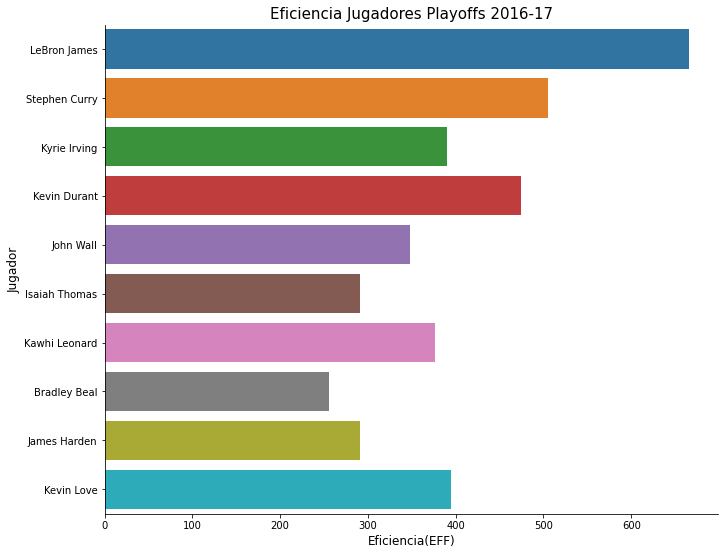

In [3]:
ut.grafica_eff(df)

#### **Asistencias y Anotaciones en la temporada 2016-17**
Se presenta un gráfico con las anotaciones (eje x) contra las asistencias (eje y) realizadas durante los playoffs de la temporada 2016-17.
Por temas de visualización únicamente se observan el top 20 de los mejores jugadores en estas estadśiticas de la temporada.

\**Nota: Se debe aclarar que asistencia unicamente es contada si el pase genera canasta.*

In [4]:
ut.df_api_lideres('2016-17','Playoffs')

,PLAYER_ID,RANK,PLAYER,TEAM,AST,PTS
0,2544,1,LeBron James,CLE,141,591
1,201939,2,Stephen Curry,GSW,114,477
2,202681,3,Kyrie Irving,CLE,95,466
3,201142,4,Kevin Durant,GSW,64,428
4,202322,5,John Wall,WAS,134,353
5,202738,6,Isaiah Thomas,BOS,100,349
6,202695,7,Kawhi Leonard,SAS,55,332
7,203078,8,Bradley Beal,WAS,35,323
8,201935,9,James Harden,HOU,93,313
9,201567,10,Kevin Love,CLE,30,303


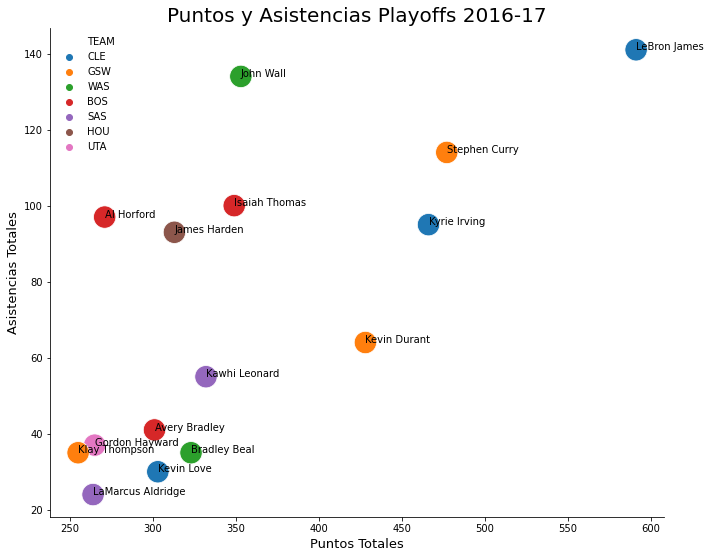

In [5]:
ut.grafica_confeti(df)

Al observar la gráfica es evidente que durante esta temporada Lebron James lidera en ambos aspectos del juego. El jugador más cercano a él es Stephen Curry y es interesante apuntar que aún Curry jugando como base del equipo, James lo supera en asistencias. Por otro lado el MVP de las finales, Kevin Durant, se queda bastante lejos de Lebron en ambos aspectos.

#### **Porcentaje de tiros de media y de 3 puntos**

Otra de las estadísticas interesantes que se utilizan mucho en la NBA es el porcentaje de tiros de media encestados (FG%) y el porcentaje de tiros de tres puntos encestados (3FG%). Estas estadísticas nos da una idea de qué tan eficaz es un jugador dentro de la cancha. Se presenta una gráfica con estos datos para el top 15 de jugadores de los playoffs de la temporada 2016-17

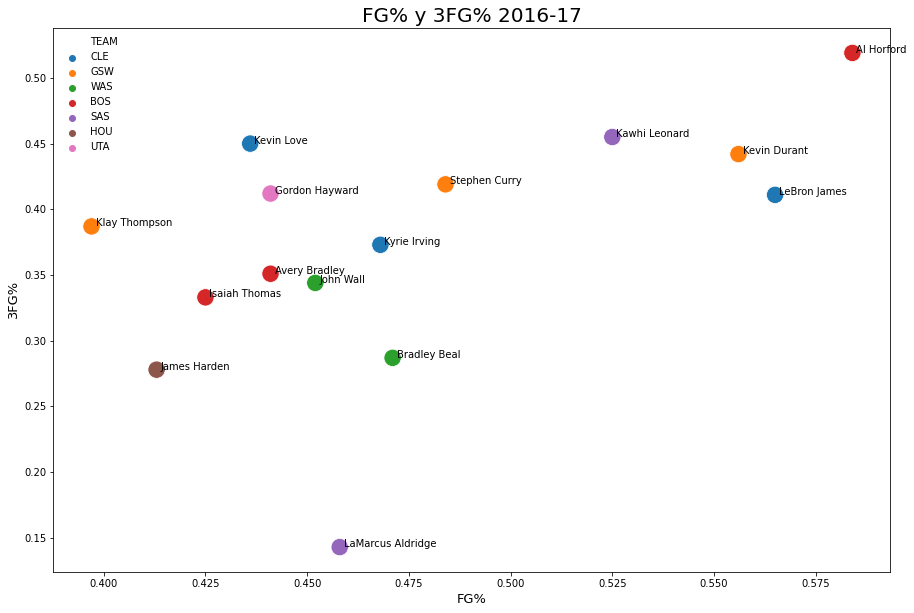

In [6]:
ut.grafica_FG(df)

Para estas métricas Kevin Durant tiene ligera ventaja sobre Lebron James, con un mejor porcentaje de tiros de 3. Cabe destacar que esta métrica es un tanto engañosa, ya que depende mucho del número de tiros intentados que haya realizado el jugador. Un ejemplo que demuestra esta idea, es un jugador que tira muy pocos tiros de 3, pero si mete 1 de 2 tiros que realizó su porcentaje queda bastante alto (0.5). Tal es el caso de Al Horford, quien al jugar en la posición de pivot, sus intentos de 3 son bastante bajos.

#### **Principales zonas de tiro de los jugadores analizados**
A continuación se presenta un gráfico de las zonas de la cancha en las que los jugadores encestan sus tiros. Puntualmente se hace el comparativo entre Lebron James (CLE) y Kevin Durant(GSW). A través de estas gráficas es posible observar la versatilidad del jugador para anotar en cualquier punto de la cancha.

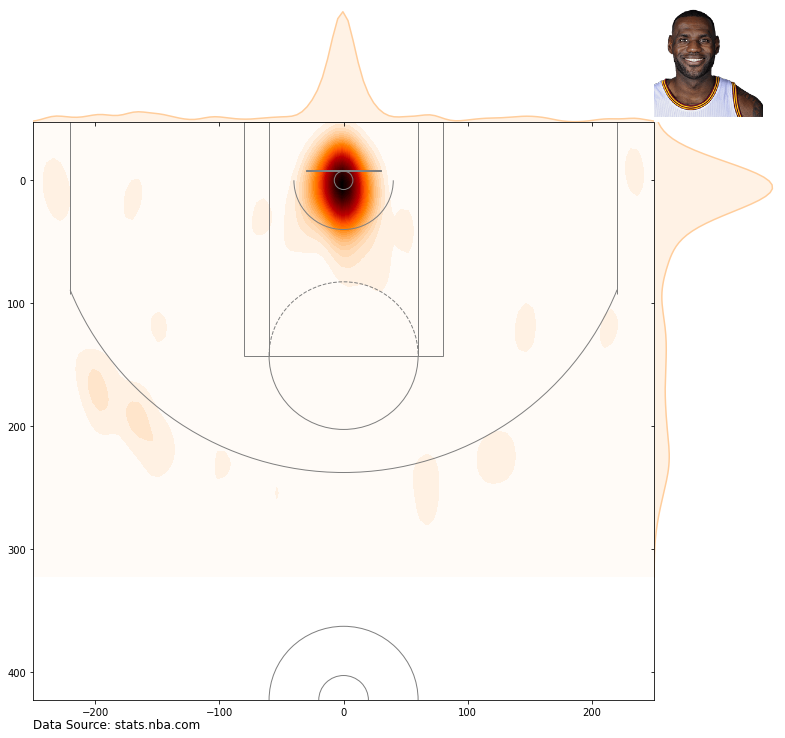

In [7]:
ut.AnotacionesJugador(2544, '2016-17', 'Playoffs')

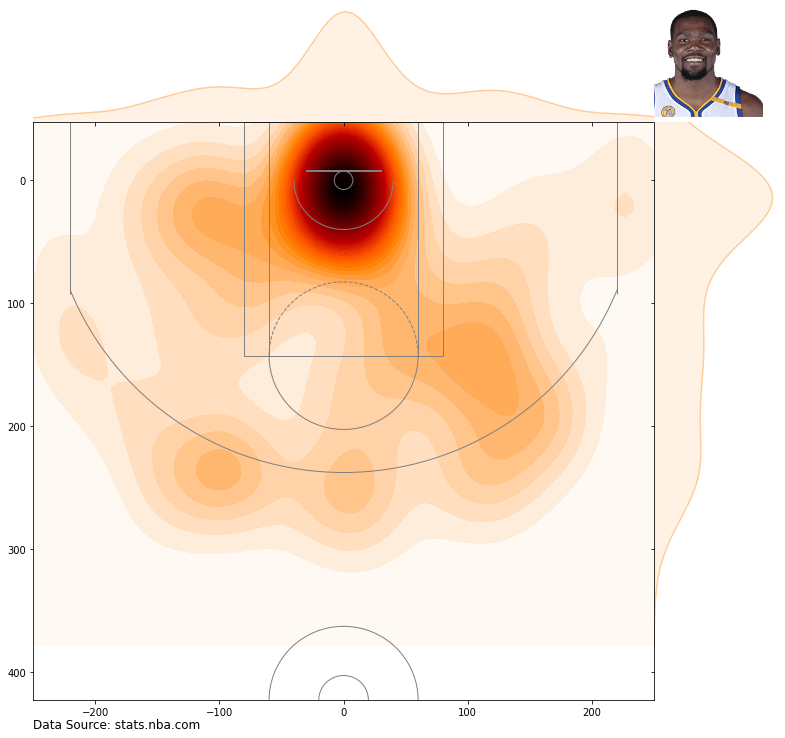

In [8]:
ut.AnotacionesJugador(201142, '2016-17', 'Playoffs')

De esta forma se ve claro que Kevin Durant presenta un tiro más diversificado a lo largo de la cancha, mientras Lebron James se concentra en la zona debajo del aro. Esto lo podemos relacionar con la gráfica anterior de porcentajes de tiro donde se vió que Durant presentaba un mayor porcentaje de tiro de 3.

### **Análisis de redes y medidas de centralidad**

Se presenta un análisis de redes con el objetivo de investigar la interconexión de un equipo, presentando una idea de cómo juega el equipo. Además, este analisis sirve para identificar a los jugadores más "conectados" dentro de cada equipo, arrojando a los jugadores fundamentales del equipo. Otras preguntas que se planean resolver en este análisis son las siguientes:

+ 1) ¿Existen cambios en la estructura de la red del equipo durante juegos de temporada regular contra juegos de playoffs?
+ 2) ¿Qué le sucede a la red cuando uno de sus jugadores estrella abandona el equipo?
+ 3) ¿Existe diferencia entre la estructura de la red de un equipo finalista y un equipo con una super estrella?

Así mismo, cada una de las gráficas de redes presenta un dataframe con las siguientes medidas de centralidad por jugador:Degree, Closeness, Eigen,Betweennes y Pagerank. La combinación de estas dos partes, nos da un completo panorama del comportamiento del equipo, evidenciando a los jugadores que mayor aporte e influencia tienen sobre el equipo y principalmente pagerank nos dirá al "jugador talismán" del equipo.


Primero empezamos por importar la información a nivel jugada para todas las temporadas que tenemos disponibles.

In [9]:
#temporada 2016-17
filename = 'NBA-PBP_2016-2017.csv'
df_16 = pd.read_csv(filename)
#temporada 2017-18
filename = 'NBA-PBP-2017-2018.csv'
df_17 = pd.read_csv(filename)
#temporada 2018-19
filename = 'NBA-PBP-2018-2019.csv'
df_18 = pd.read_csv(filename)
#temporada 2019-20
filename = 'NBA-PBP-2019-2020.csv'
df_19 = pd.read_csv(filename)

In [10]:
df_16['Season'] = '2016-2017'
df_17['Season'] = '2017-2018'
df_18['Season'] = '2018-2019'
df_19['Season'] = '2019-2020'

In [11]:
data = df_16
data = data.append(df_17)
data = data.append(df_18)
data = data.append(df_19)

Filtraremos solo por las canastas concretadas.

In [12]:
#filtramos por tiros concretados
make = data['ShotOutcome'] == 'make'
data_make = data[make]

Aqui creamos la **tabla de pares**.

In [13]:
df_pairs = data_make.groupby(["Shooter", "Assister", "GameType", "Season"]).size().reset_index().rename(columns={0:'count'})
df_pairs[['shooter','sh_team']]= df_pairs.Shooter.str.split(" - ",expand=True)
df_pairs[['assister','as_team']]= df_pairs.Assister.str.split(" - ",expand=True)
df_pairs['team'] = df_pairs['sh_team']
select = ['shooter', 'assister', 'team', 'GameType', 'Season', 'count']
df_pairs = df_pairs[select]
df_pairs = df_pairs.rename(columns={"GameType":"gametype", "Season":"season"})
df_pairs.head()

,shooter,assister,team,gametype,season,count
0,. Abrines,A. Roberson,OKC,regular,2016-2017,6
1,. Abrines,C. Anthony,OKC,regular,2017-2018,8
2,. Abrines,C. Payne,OKC,regular,2016-2017,3
3,. Abrines,D. Johnson,OKC,regular,2017-2018,3
4,. Abrines,D. McDermott,OKC,playoff,2016-2017,1


Aqui creamos la tabla de **shot involvement**.

In [14]:
sql = "SELECT Shooter, Assister, GameType, Season, count(*) as count \
        FROM data_make \
        GROUP BY Shooter, Assister, GameType, Season \
        ORDER BY count(*) DESC"
query = pandasql.sqldf(sql, globals())

In [15]:
query[['shooter','sh_team']]= query.Shooter.str.split(" - ",expand=True)
query[['assister','as_team']]= query.Assister.str.split(" - ",expand=True)
query['team'] = query['sh_team']
select = ['shooter', 'assister', 'team', 'GameType', 'Season', 'count']
query = query[select]
query = query.rename(columns={"GameType":"gametype", "Season":"season"})

In [16]:
shooter = query.groupby(['shooter', 'team', 'gametype', 'season'])['count'].sum().reset_index()
shooter = shooter.rename(columns={"shooter":"player"})
assister = query.groupby(['assister', 'team', 'gametype', 'season'])['count'].sum().reset_index()
assister = assister.rename(columns={"assister":"player"})
df_involvement = shooter.append(assister)
df_involvement = df_involvement.groupby(['player', 'team', 'gametype', 'season'])['count'].sum().reset_index()
df_involvement = df_involvement.rename(columns={"count":"shot_involvement"})
df_involvement.head()

,player,team,gametype,season,shot_involvement
0,. Abrines,OKC,playoff,2016-2017,12
1,. Abrines,OKC,playoff,2017-2018,10
2,. Abrines,OKC,regular,2016-2017,174
3,. Abrines,OKC,regular,2017-2018,147
4,. Ak,CHI,regular,2017-2018,3


Para responder a la **pregunta 1)** se analizará la estructura de redes de los dos equipos finalistas a lo largo de la temporada regular y durante los playoffs de la temporada 2016-2017. Dado que el nivel de exigencia es mayor durante los playoffs, se espera que la estructura de la red del equipo sufra algún cambio, pudiendo ser que los jugadores estrella carguen más al equipo o que el juega se distribuya más equitativamente entre el rooster del equipo.

##### 1 a) Cleveland

/home/miguelmillan13/Documentos/Programas/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


,Team,Degree,Closeness,Eigen,Betweennes,Pagerank
L. James,CLE,9,0.909091,0.348396,0.0409524,0.204623
K. Irving,CLE,9,0.909091,0.348396,0.0409524,0.198653
K. Love,CLE,9,0.909091,0.348396,0.0409524,0.121401
D. Williams,CLE,11,0.909091,0.382359,0.0842857,0.0990634
T. Thompson,CLE,7,0.769231,0.287817,0.0177778,0.0847397
K. Korver,CLE,8,0.833333,0.314295,0.047619,0.0697024
I. Shumpert,CLE,8,0.833333,0.314295,0.047619,0.0625439
C. Frye,CLE,8,0.833333,0.315954,0.0322222,0.0611453
J. Smith,CLE,5,0.625,0.209479,0.0031746,0.0389667
R. Jefferson,CLE,5,0.666667,0.221489,0,0.0384072


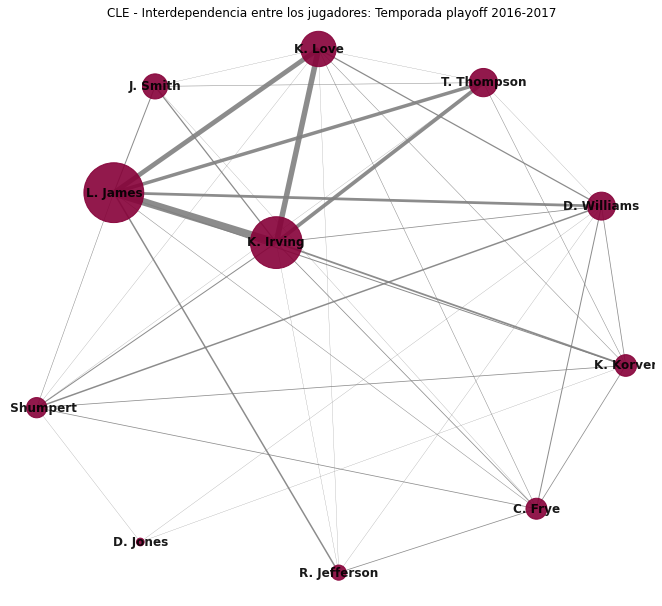

In [17]:
ut.draw_network_all('CLE','2016-2017','playoff',df_involvement,df_pairs)

/home/miguelmillan13/Documentos/Programas/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


,Team,Degree,Closeness,Eigen,Betweennes,Pagerank
L. James,CLE,14,0.85,0.266698,0.00706442,0.172251
K. Irving,CLE,14,0.85,0.260438,0.0136242,0.163711
K. Love,CLE,12,0.772727,0.233145,0.0033731,0.0883998
T. Thompson,CLE,13,0.809524,0.250976,0.00499223,0.0883582
R. Jefferson,CLE,17,1,0.286212,0.0921309,0.0729303
I. Shumpert,CLE,16,0.944444,0.281979,0.0504643,0.0601849
D. Williams,CLE,16,0.85,0.262024,0.0578517,0.0537754
K. Korver,CLE,13,0.809524,0.250976,0.00499223,0.0428904
K. Felder,CLE,13,0.809524,0.244128,0.0106013,0.0404972
C. Frye,CLE,14,0.85,0.266698,0.00706442,0.0375241


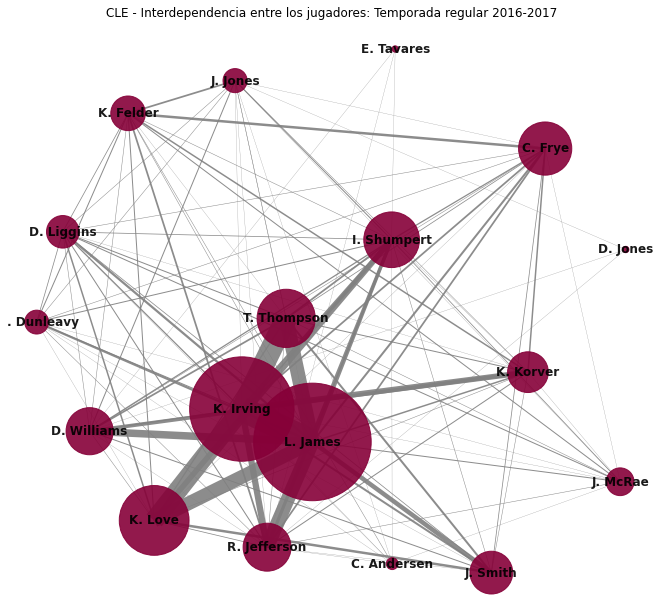

In [18]:
ut.draw_network_all('CLE','2016-2017','regular',df_involvement,df_pairs)

En ambos casos se ve claro que los nodos más grandes y con conexiones más fuertes son el tridente de estrellas que presenta el equipo (Lebron James, Kyrie Irving y Kevin Love), junto con Thomson (jugador del cuadro titular). Por un lado la red de la temporada regular presenta nodos más grandes y una cantidad mayor de conexiones; lo cual debe deberse al mayor número de partidos jugados durante la temporada regular. Respecto a las medidas de centralidad es notorio que a lo largo de la temporada regular existe mayor distriución a lo largo de todo el equipo, mientras que en playoffs se concentra en los jugadores base del equipo (es importante notar que existen más nodos en temporada regular que en playoffs). Pagerank nos deja claro la posición de cada jugador en el equipo, siendo las dos super estrellas (James e Irving) los que acaparan este ámbito y conservando la misma situación para temporada regular y playoffs.

##### 1 b) Golden State Warriors

/home/miguelmillan13/Documentos/Programas/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


,Team,Degree,Closeness,Eigen,Betweennes,Pagerank
D. Green,GSW,11,0.866667,0.330622,0.0349512,0.178652
K. Durant,GSW,10,0.8125,0.312051,0.0178571,0.132152
S. Curry,GSW,11,0.866667,0.330622,0.0349512,0.110436
K. Thompson,GSW,10,0.8125,0.312051,0.0178571,0.0921834
A. Iguodala,GSW,11,0.866667,0.330622,0.0349512,0.0862687
D. West,GSW,9,0.764706,0.282762,0.0173077,0.081098
I. Clark,GSW,10,0.8125,0.295436,0.0463675,0.0594141
J. McGee,GSW,7,0.684211,0.235183,0.00160256,0.0516569
Z. Pachulia,GSW,6,0.619048,0.20733,0,0.0461269
S. Livingston,GSW,9,0.764706,0.267584,0.0328144,0.0457093


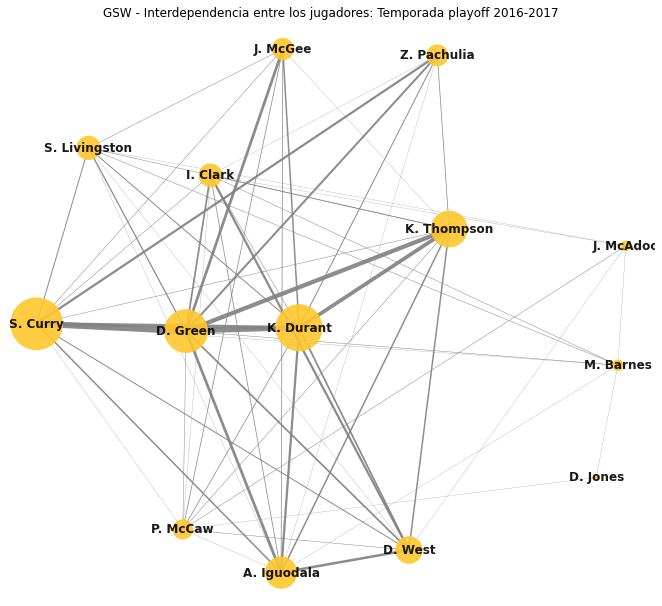

In [19]:
ut.draw_network_all('GSW','2016-2017','playoff',df_involvement,df_pairs)

/home/miguelmillan13/Documentos/Programas/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


,Team,Degree,Closeness,Eigen,Betweennes,Pagerank
D. Green,GSW,13,0.842105,0.264645,0.00304293,0.164655
K. Thompson,GSW,13,0.842105,0.264645,0.00304293,0.124297
S. Curry,GSW,14,0.888889,0.273956,0.0144318,0.121463
K. Durant,GSW,13,0.842105,0.256215,0.0120707,0.112254
A. Iguodala,GSW,14,0.888889,0.270972,0.0238763,0.0913454
I. Clark,GSW,16,1,0.286516,0.0651263,0.0603114
D. West,GSW,11,0.761905,0.229728,0.000694444,0.058082
Z. Pachulia,GSW,12,0.8,0.248056,0.00145202,0.0474211
P. McCaw,GSW,16,1,0.286516,0.0651263,0.0432738
J. McGee,GSW,11,0.761905,0.230215,0.000694444,0.0381294


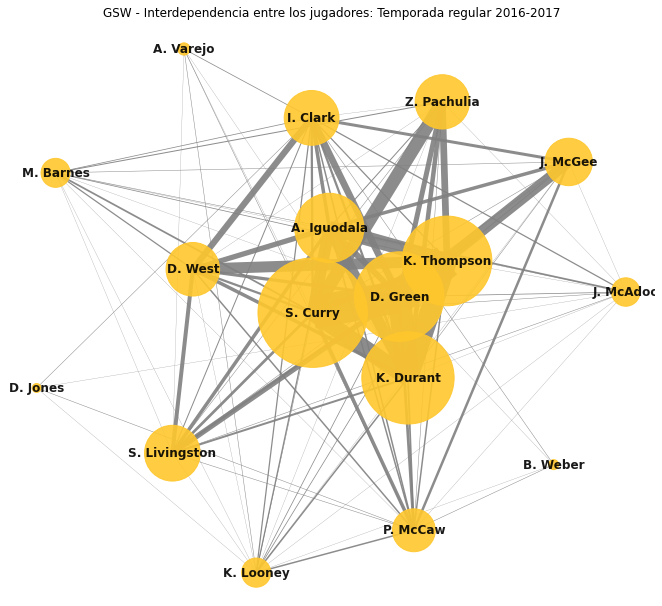

In [20]:
ut.draw_network_all('GSW','2016-2017','regular',df_involvement,df_pairs)

La primer diferencia que se observa respecto a CLE es que existe mayor distribución de la carga del equipo. Tanto en temporada regular(siendo más evidente en este caso) como en playoffs, son 4 los jugadores que concentran al equipo (Durant,Curry,Thompson y Green) y la participación de jugadores no titulares parece más significativa. Esto estaría diciendo que GSW es un equipo que distribuye más su juego a través de más jugadores, mientras CLE esta concentrado completamente en sus jugadores pilares. Las medidas de centralidad nos arrojan resultados similares a lo ya comentado, pero se ven cosas interesantes:
+ Klay Thompson tiene un mejor desempeño en temporada regular que en playoffs, ubicandose en el segundo puesto del pagerank para temporada regular, y bajando a la cuarta posición durante playoffs.
+ El jugador más relevante para GSW según los resultados de pagerank es Draymond Green. Esto es interesante, ya que aunque es considerado como un jugador importante, todos los reflectores están sobre los considerados superestrellas (Kevin Durant y Stepehn Curry). Otra cosa es que la posición en la que juega Green (ala-pívot) normalmente unicamente concentra generación de puntos y no tanta distribución de juego, lo cual nos habla de la versatilidad del jugador.
************+ Betweeenes es alto en jugadores que no son los protanistas, Clark y Looney presentan los valores más altos. Esto se debe a que estos jugadores son los que relacionan a los jugadores titulares con la banca.

Durante los años 2011-2017 uno de los jugadores pilares de CLE fue Kyrie Irving. Elegido número 1 del draft de la NBA por CLE, Kyrie llegó para volver a poner a CLE en el mapa luego de la salida de Lebron James un año atras. A partir de la temporada 2014-15 y hasta la 2016-17, Kyrie Irving y Lebron James hicieron una buena mancuerna de superestrellas en CLE, llevandolos a 3 finales consecutivas y obteniendo un anillo de campeón en esos 3 años. A la temporada siguiente (2017-18) Kyrie abandonó a Cle para formar parte del equipo historico de Boston.
Para responder la **pregunta 2)** se comparará el comportamiento de la red del equipo de CLE con Kyrie en el rooster(temporada 2016-17) y sin él (temporada 2017-18). Se espera observar mayor protagonismo de algún otro jugador del roster de CLE o incluso un acaparamiento total de parte de Lebron James.

*Nota: se analizará temporada regular debido a que en la temporada 18-19 CLE no llegó a los playoffs*

/home/miguelmillan13/Documentos/Programas/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


,Team,Degree,Closeness,Eigen,Betweennes,Pagerank
L. James,CLE,14,0.85,0.266698,0.00706442,0.172251
K. Irving,CLE,14,0.85,0.260438,0.0136242,0.163711
K. Love,CLE,12,0.772727,0.233145,0.0033731,0.0883998
T. Thompson,CLE,13,0.809524,0.250976,0.00499223,0.0883582
R. Jefferson,CLE,17,1,0.286212,0.0921309,0.0729303
I. Shumpert,CLE,16,0.944444,0.281979,0.0504643,0.0601849
D. Williams,CLE,16,0.85,0.262024,0.0578517,0.0537754
K. Korver,CLE,13,0.809524,0.250976,0.00499223,0.0428904
K. Felder,CLE,13,0.809524,0.244128,0.0106013,0.0404972
C. Frye,CLE,14,0.85,0.266698,0.00706442,0.0375241


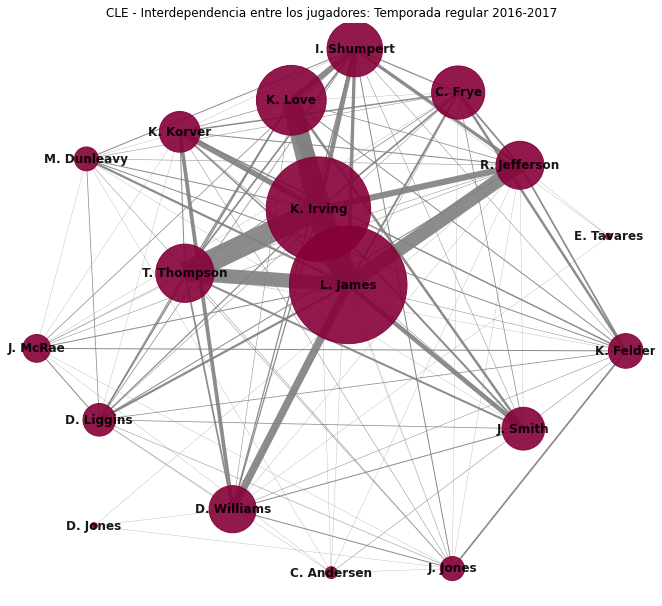

In [27]:
ut.draw_network_all('CLE','2016-2017','regular',df_involvement,df_pairs)

/home/miguelmillan13/Documentos/Programas/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


,Team,Degree,Closeness,Eigen,Betweennes,Pagerank
L. James,CLE,19,0.913043,0.280829,0.0417237,0.161491
K. Love,CLE,17,0.807692,0.26095,0.0210151,0.0829641
D. Wade,CLE,13,0.724138,0.204029,0.0126891,0.0771764
K. Korver,CLE,19,0.913043,0.276386,0.0537475,0.0742882
J. Smith,CLE,18,0.875,0.271582,0.0327158,0.0742627
J. Green,CLE,20,0.954545,0.285633,0.0643427,0.0711195
J. Caldern,CLE,18,0.875,0.26267,0.0472207,0.0595814
T. Thompson,CLE,16,0.777778,0.247411,0.0202307,0.0447801
J. Crowder,CLE,12,0.677419,0.193353,0.00306878,0.0431844
L. Nance,CLE,11,0.65625,0.182135,0.00218254,0.0370923


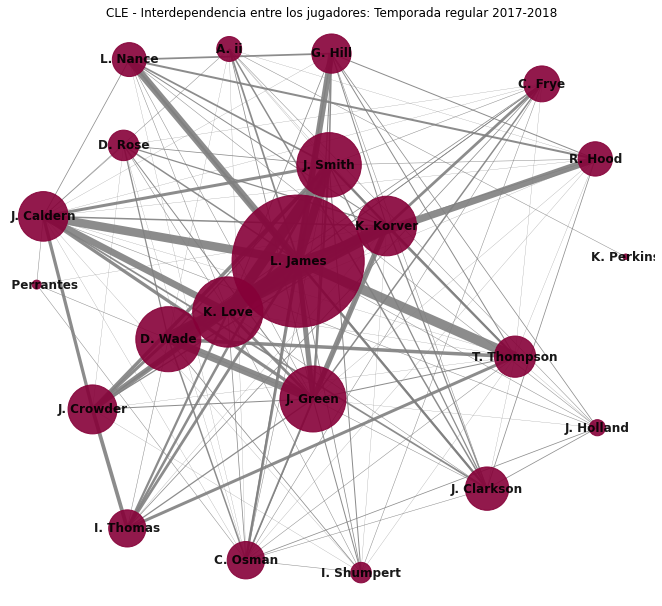

In [28]:
ut.draw_network_all('CLE','2017-2018','regular',df_involvement,df_pairs)

Se observa justamente lo que se pensaba, después de la salida de Irving, Lebron James se echa al equipo al hombro presentando muchas y más fuertes conexiones con gran parte de los jugadores del equipo. Aún se observa a Kevin love como jugador clave pero no se observa un aumento en su protagonismo. Pagerank confirma el acaparamiento de James en el equipo, dejandolo muy por encima de los demás jugadores.

Para la temporada 2018-19 Cleveland perdió a su superestrella Lebron James y el equipo presenta la siguiente red:

/home/miguelmillan13/Documentos/Programas/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


,Team,Degree,Closeness,Eigen,Betweennes,Pagerank
C. Sexton,CLE,21,0.888889,0.27461,0.0452149,0.116132
C. Osman,CLE,21,0.888889,0.270849,0.0497686,0.108197
L. Nance,CLE,21,0.888889,0.269782,0.0511442,0.102787
J. Clarkson,CLE,23,0.96,0.289418,0.0650949,0.0994364
A. Burks,CLE,15,0.727273,0.204198,0.0619006,0.0573795
T. Thompson,CLE,18,0.8,0.240043,0.0299215,0.0556826
R. Hood,CLE,18,0.8,0.243002,0.0262306,0.0536829
K. Love,CLE,13,0.666667,0.195181,0.00558457,0.0392851
A. Zizic,CLE,17,0.774194,0.229191,0.0255636,0.0389702
B. Knight,CLE,13,0.666667,0.190448,0.00523781,0.0359749


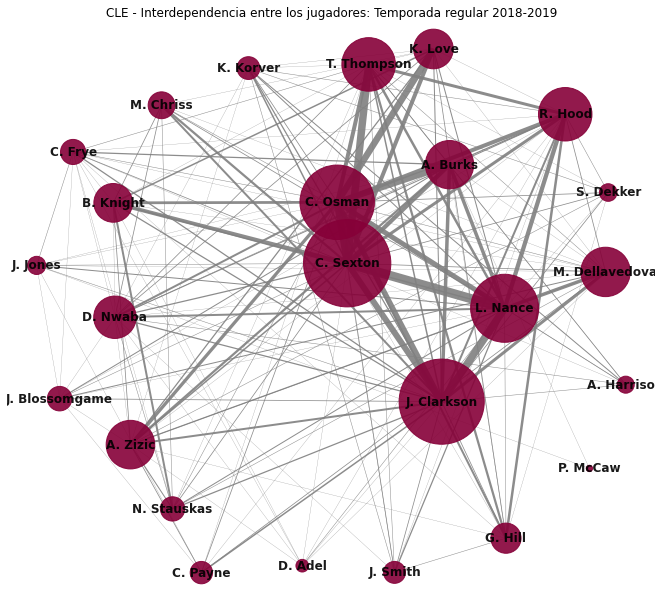

In [29]:
ut.draw_network_all('CLE','2018-2019','regular',df_involvement,df_pairs)

Para comenzar es importante mencionar que sin sus dos superestrellas, CLE fue incapaz de llegar a los playoffs.Es evidente que tras la salida de James e Irving, el protagonismo del equipo queda dividido entre 4 o 5 jugadores, sin tener un claro referente del equipo. Los valores arrojados por Pagerank se vuelven más equitativos entre los jugadores, teniendo a cuatro jugadores con valores muy similares a la cabeza de la lista de pagerank.

*********Conclusiones del análisis: Con los visto anteriormente es clara la repercusión que tiene un equipo de NBA tener o no a una superestrella.

Una de las máximas estrellas que ha tenido la NBA en los últimos 5 años es Russel Westbrook. Con promedio de puntos y asistencias históricos y rompiendo el record de más triples-dobles en una sola temporada al conseguir 42; Westbrook fue acreedor al MVP de la temporada regular 2016-17. Lo curioso es que su equipo, Oklahoma (OKC), fue eliminado en la primer ronda de los playoffs por los Rockets de Houston. Esto confirma que aún con el jugador más valioso dentro de un equipo, no se garantiza el campeonato. Con esta idea se resolverá la **pregunta 3)**, contrastando las redes de OKC contra las de los finalistas. Se espera observar un mayor equilibrio por parte de los finalistas, mientras un equipo complemtante cargado hacia Westbrook por parte de OKC.

/home/miguelmillan13/Documentos/Programas/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


,Team,Degree,Closeness,Eigen,Betweennes,Pagerank
R. Westbrook,OKC,17,0.947368,0.287031,0.0920064,0.233993
V. Oladipo,OKC,17,0.947368,0.294512,0.0478966,0.130844
S. Adams,OKC,13,0.782609,0.250832,0.00787685,0.114029
E. Kanter,OKC,15,0.857143,0.275132,0.0227254,0.0538428
D. Sabonis,OKC,13,0.782609,0.251166,0.00853045,0.0514901
S. Christon,OKC,16,0.9,0.274242,0.0782213,0.047563
A. Roberson,OKC,14,0.818182,0.260862,0.0185704,0.047349
J. Lauvergne,OKC,12,0.75,0.232467,0.00776014,0.0440891
J. Grant,OKC,17,0.947368,0.294512,0.0478966,0.0422013
T. Gibson,OKC,9,0.666667,0.187788,0,0.036799


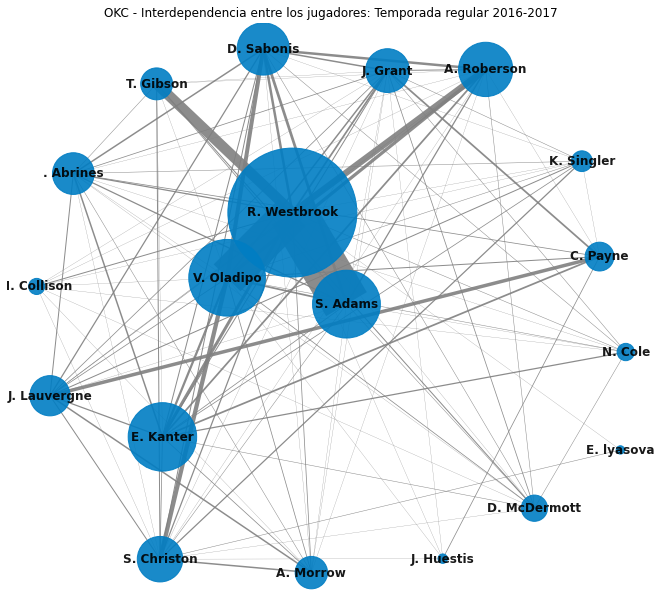

In [37]:
ut.draw_network_all('OKC','2016-2017','regular',df_involvement,df_pairs)

EL protagonismo de Russel Westbrook es más que evidente en la red del equipo, presentando un sumamente grande y conexiones con gran parte de la plantilla. En el centro de la grafica se observan los 3 jugadores fundamentales del equipo, presentando conexiones sumamente densas entre ellos. A diferencia de GSW y CLE, donde el juego se observa más distribuido, parece que OKC tiene un solo jugador (Westbrook), el cual es ayudado en cierta medida por Oladio y Adams. Respecto a las medidas de centralidad, es interesante observar que en este caso Westbrook se las lleva todas, incluida betweenes.
Se observa perfectamente la razón por la cual no son campeones de la NBA, todo se encuentra concentrado en un solo jugador, cuando el basketball es un juego de conjunto y debe ser jugado como tal.

Conclusiones Finales

+ Por que son no dirigidas las gráficas: son igual de importantes las asistencais que la anotación.
+ Por que agarra el peso como el reciproco: tiene que ver con la distancia.

### Referencias:

+ nba_api.Github.https://github.com/swar/nba_api
+ Callum Ballard. Who is the Premier League’s Most Important Player?.https://towardsdatascience.com/who-is-the-premier-leagues-most-important-player-4f184f7b39e4.
+ nba stats.https://stats.nba.com/.
+ Felipe González. Métodos Analíticos.https://heuristic-bhabha-ae33da.netlify.app/
+ Savvas Tjortjoglou.How to Create NBA Shot Charts in Python.http://savvastjortjoglou.com/nba-shot-sharts.html